# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
  - Sumber: [kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-datase)

Dataset ini berisi informasi mengenai kebiasaan tidur seseorang, seperti jenis kelamin, usia, durasi tidur, aktivitas fisik, tingkat stres, dan lainnya. Tujuannya adalah untuk memprediksi status kondisi tidur seseorang (baik atau buruk).

2. Dataset terdiri dari:
- 374 data (baris)
- 12 kolom (fitur + target)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#import library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code hereimport pandas as pd

# Load data
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')  # Sesuaikan dengan nama file

# Cek 5 baris pertama
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Cek jumlah baris dan kolom
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

# Cek info struktur kolom
df.info()


Dataset memiliki 374 baris dan 13 kolom.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memo

In [4]:
#Tipe Data
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [5]:
# Statistik Deskriptif dari dataset
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
# Menampilkan jumlah nilai unik untuk setiap kolom kategorikal
for col in ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']:
    print(f"{col}:\n{df[col].value_counts()}\n")


Gender:
Gender
Male      189
Female    185
Name: count, dtype: int64

Occupation:
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

BMI Category:
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Sleep Disorder:
Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64



In [7]:
# Menampilkan jumlah nilai unik untuk setiap kolom numerik
for col in ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps']:
    print(f"{col}: {df[col].nunique()} unique values")

Age: 31 unique values
Sleep Duration: 27 unique values
Quality of Sleep: 6 unique values
Physical Activity Level: 16 unique values
Stress Level: 6 unique values
BMI Category: 4 unique values
Heart Rate: 19 unique values
Daily Steps: 20 unique values


In [8]:
#Cek Missing Value
print(df.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [9]:
# Mengecek nilai unik dan jumlahnya pada kolom 'Sleep Disorder'
print("Sebelum imputasi missing value pada 'Sleep Disorder':")
print(df['Sleep Disorder'].value_counts(dropna=False))
print("\nJumlah missing value pada 'Sleep Disorder':", df['Sleep Disorder'].isnull().sum())

Sebelum imputasi missing value pada 'Sleep Disorder':
Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

Jumlah missing value pada 'Sleep Disorder': 219


In [10]:
# Mengganti nilai missing pada kolom Sleep Disorder dengan kata 'None'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

Nilai missing pada kolom Sleep Disorder diganti dengan 'None' untuk menandakan bahwa individu tersebut tidak memiliki gangguan tidur yang teridentifikasi. Nilai ini diganti saat data loading agar memudahkan saat melakukan proses EDA.

Insight Data Loading:

- Data terdiri dari 374 baris unik, 13 kolom (demografi, gaya hidup, kesehatan, label gangguan tidur).
- Fitur numerik: 
  - Usia rata-rata 42 tahun (27–59), variasi baik.
  - Durasi tidur rata-rata 7,1 jam (5,8–8,5), mayoritas di atas 6 jam.
  - Kualitas tidur rata-rata 7,3/9, distribusi baik.
  - Aktivitas fisik rata-rata 59 (30–90), variasi cukup.
  - Stress rata-rata 5,4 (skala 3–8).
  - Heart rate rata-rata 70 bpm (65–86), langkah harian rata-rata 6.800 (3.000–10.000).
- Fitur kategorikal:
  - Gender seimbang (189 laki-laki, 185 perempuan).
  - Mayoritas profesi tenaga kesehatan (Nurse, Doctor), profesi lain minoritas.
  - BMI didominasi Normal (195) & Overweight (148), Obese sangat sedikit.
  - Sleep Disorder: Sleep Apnea 78, Insomnia 77, kelas 'None' tidak muncul di summary (perlu cek label).
- Dataset bersih, distribusi wajar, namun label target tidak seimbang.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

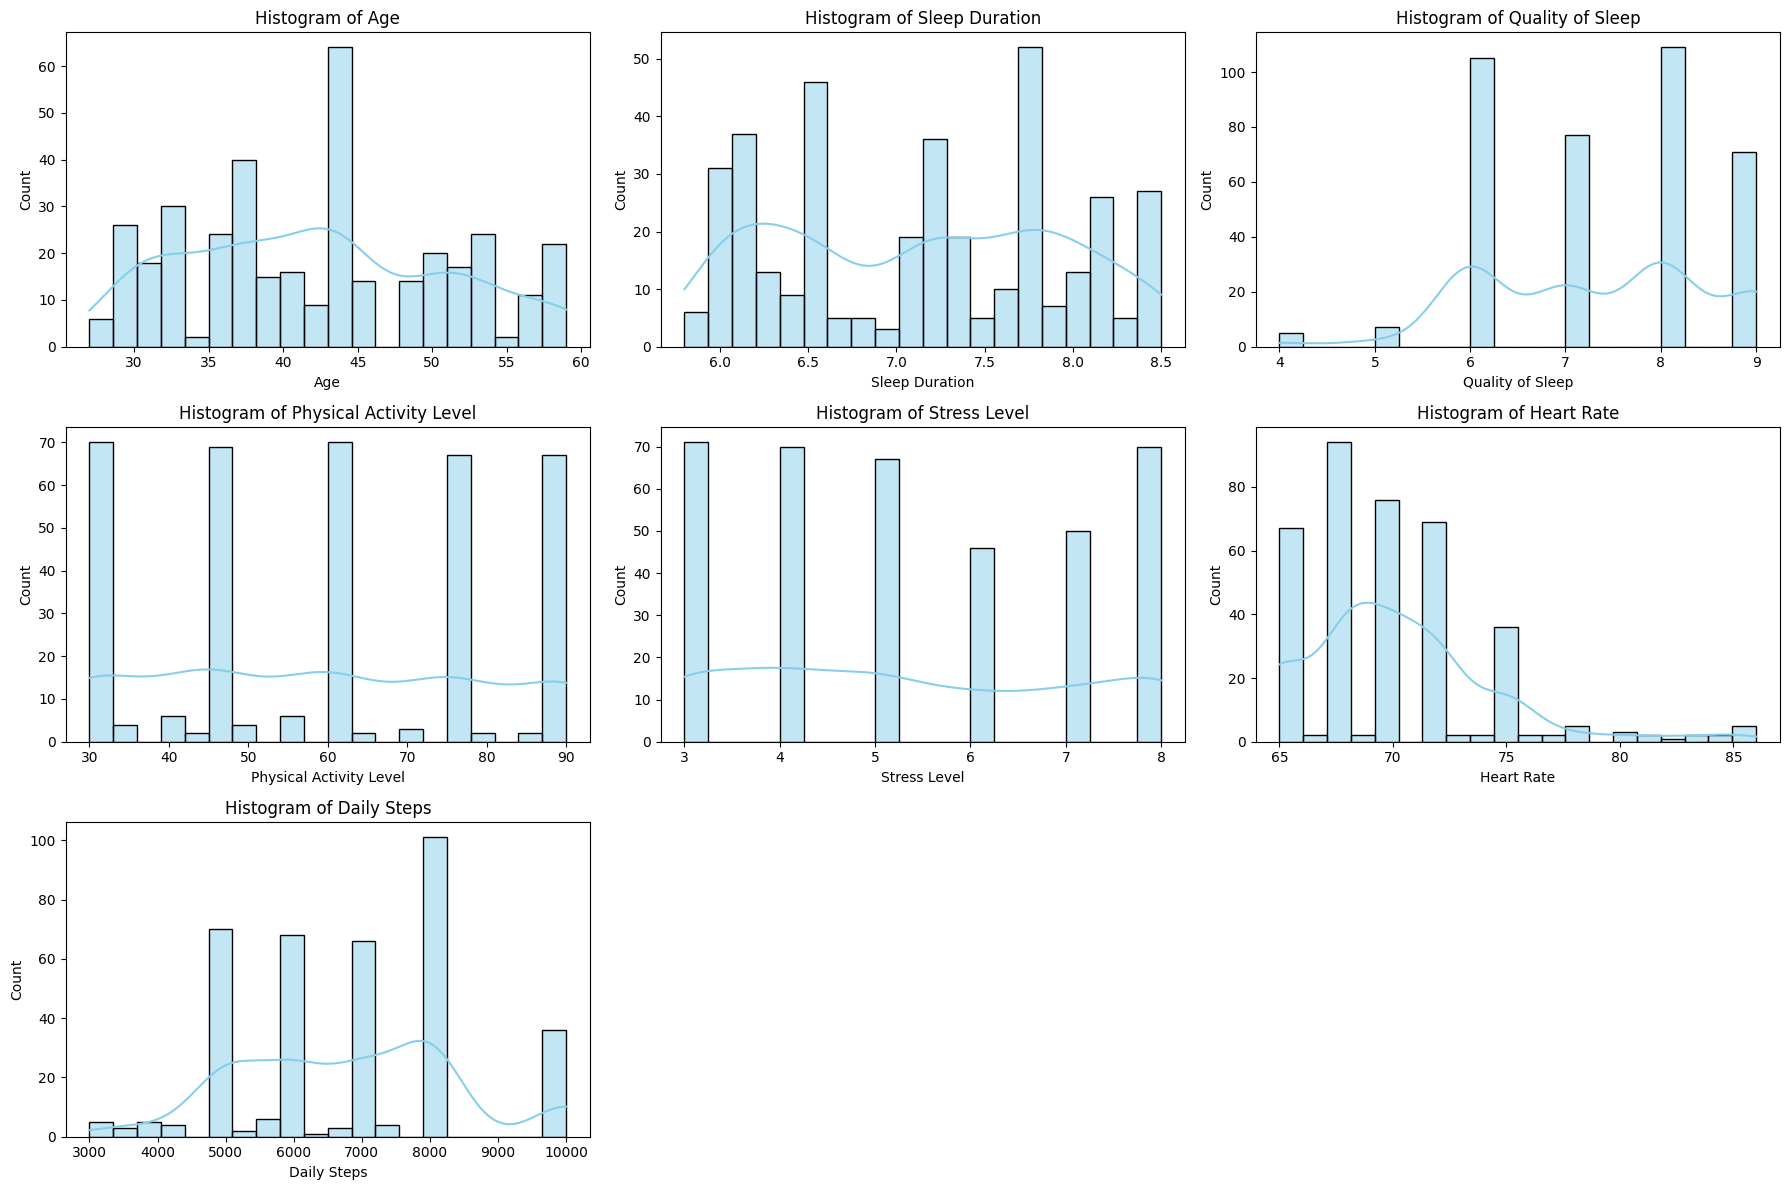

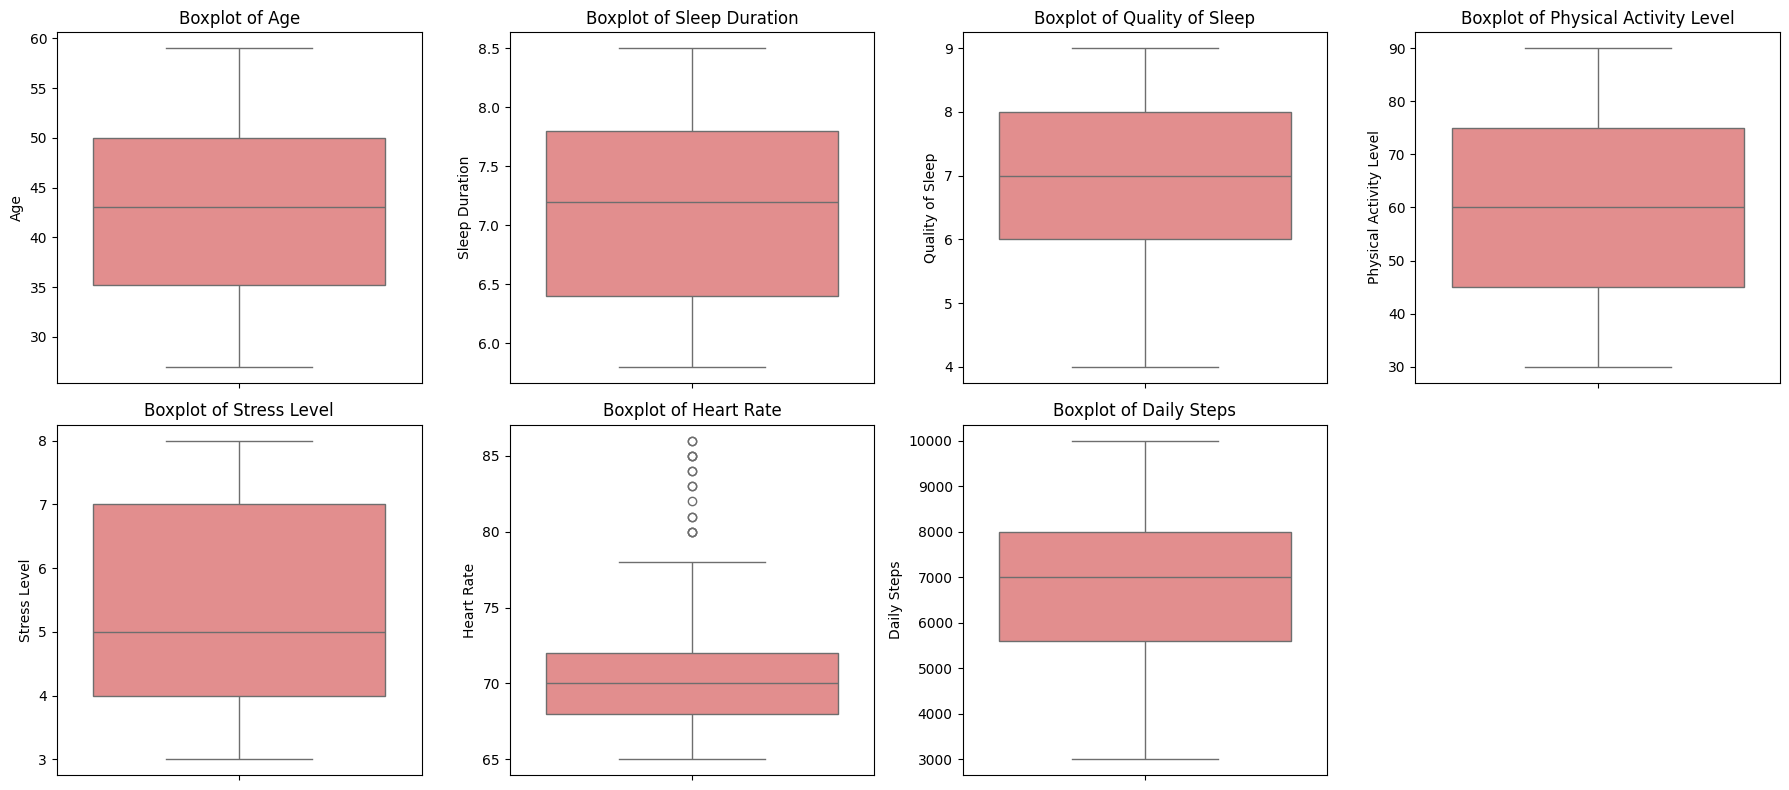

In [11]:
# Daftar fitur numerik yang akan divisualisasikan
numeric_features = [
    'Age', 'Sleep Duration', 'Quality of Sleep',
    'Physical Activity Level', 'Stress Level',
    'Heart Rate', 'Daily Steps'
]

# Histogram untuk setiap fitur numerik
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Boxplot untuk deteksi outlier tiap fitur numerik
plt.figure(figsize=(18, 8))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
#Type your code here

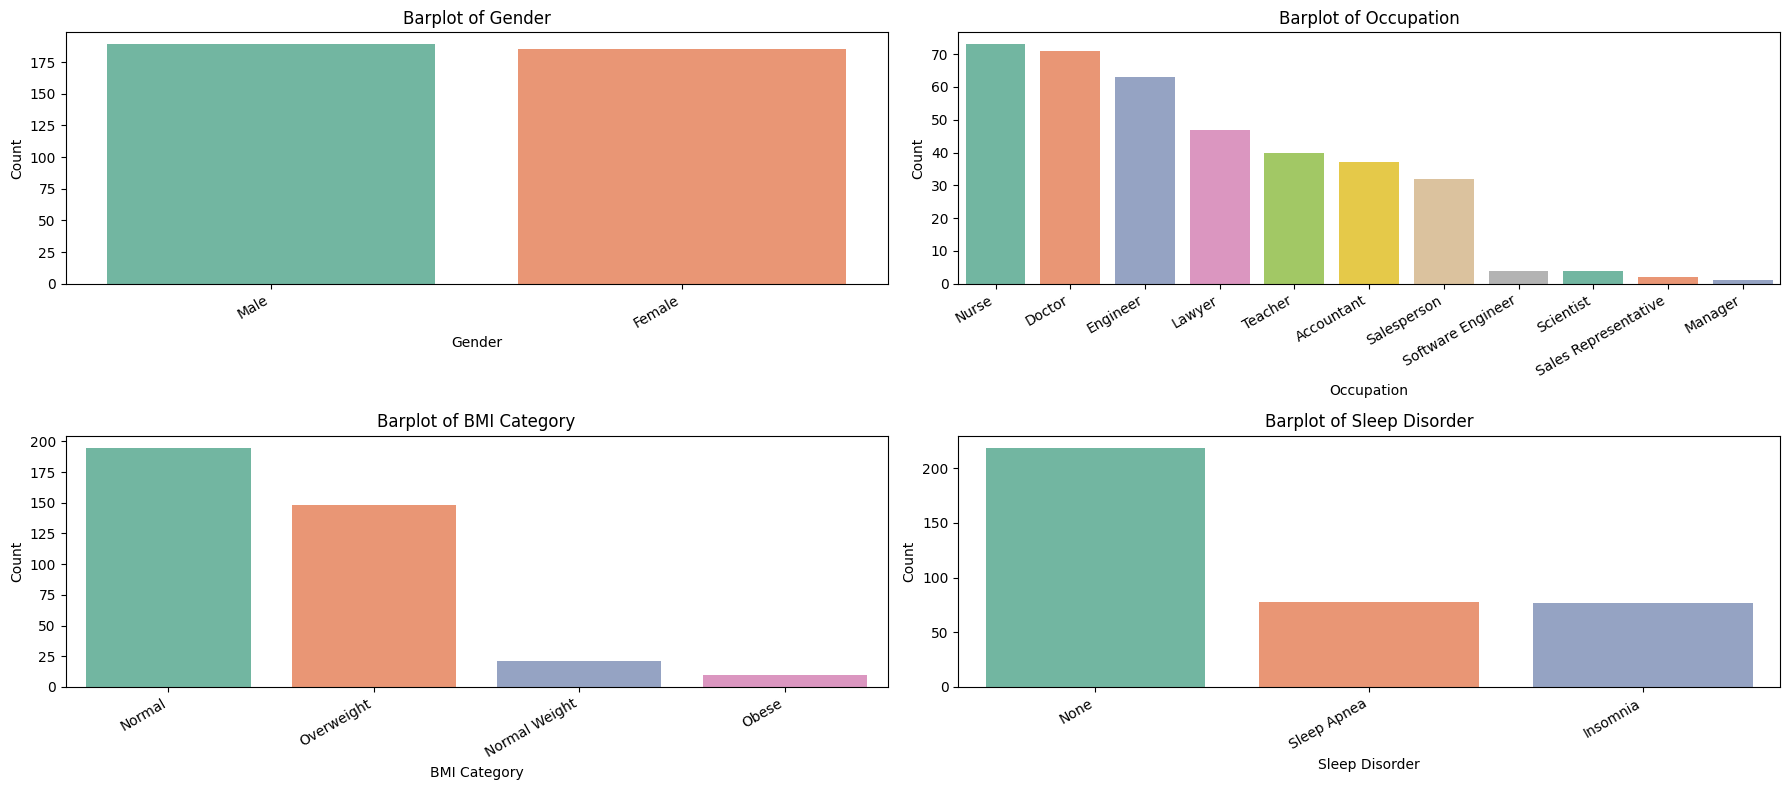

In [12]:
# Visualisasi fitur kategorikal dengan barplot

categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

plt.figure(figsize=(18, 8))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.title(f'Barplot of {col}')
    plt.xticks(rotation=30, ha='right')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Cek Korelasi Antar Fitur Numerik**

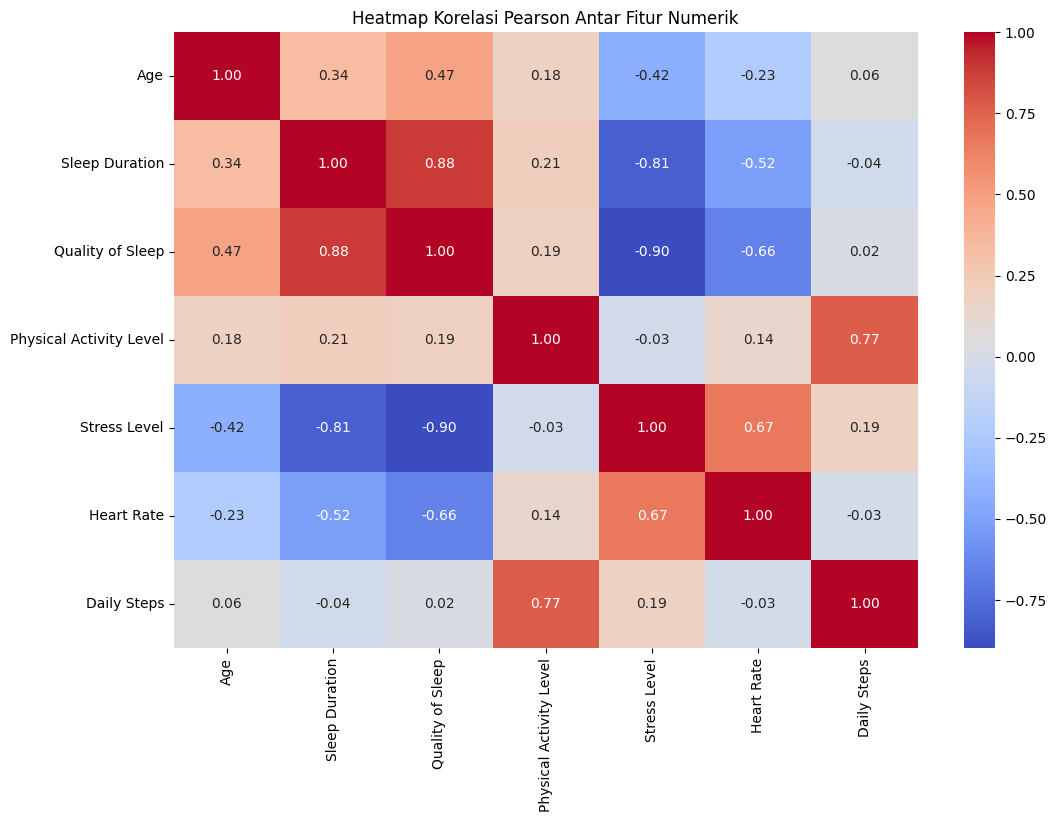

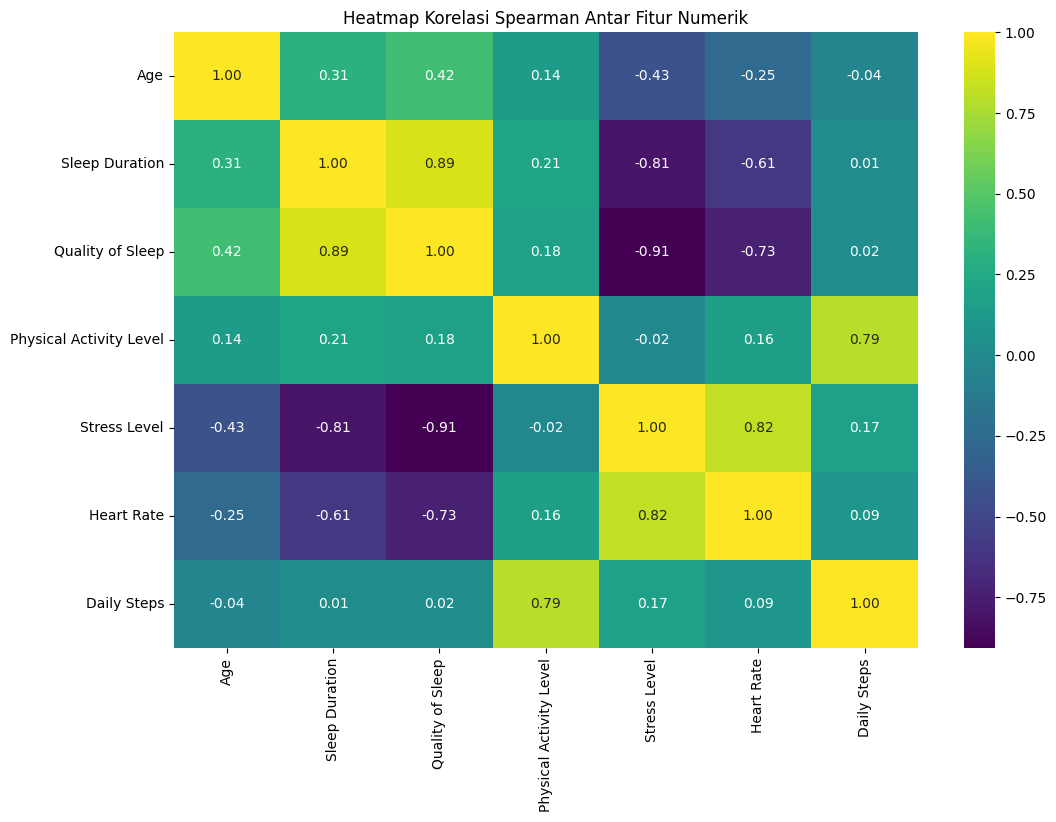


Pasangan fitur dengan korelasi tinggi atau sangat rendah (Pearson):
  Age & Physical Activity Level: 0.18 (sangat rendah)
  Age & Daily Steps: 0.06 (sangat rendah)
  Sleep Duration & Quality of Sleep: 0.88 (tinggi)
  Sleep Duration & Stress Level: -0.81 (tinggi)
  Sleep Duration & Daily Steps: -0.04 (sangat rendah)
  Quality of Sleep & Physical Activity Level: 0.19 (sangat rendah)
  Quality of Sleep & Stress Level: -0.90 (tinggi)
  Quality of Sleep & Daily Steps: 0.02 (sangat rendah)
  Physical Activity Level & Stress Level: -0.03 (sangat rendah)
  Physical Activity Level & Heart Rate: 0.14 (sangat rendah)
  Physical Activity Level & Daily Steps: 0.77 (tinggi)
  Stress Level & Daily Steps: 0.19 (sangat rendah)
  Heart Rate & Daily Steps: -0.03 (sangat rendah)

Pasangan fitur dengan korelasi tinggi atau sangat rendah (Spearman):
  Age & Physical Activity Level: 0.14 (sangat rendah)
  Age & Daily Steps: -0.04 (sangat rendah)
  Sleep Duration & Quality of Sleep: 0.89 (tinggi)
  Sleep Dur

In [13]:
# Menghitung matriks korelasi Pearson
corr_matrix_pearson = df[numeric_features].corr(method='pearson')

# Visualisasi heatmap korelasi Pearson
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Pearson Antar Fitur Numerik')
plt.show()

# Menghitung matriks korelasi Spearman
corr_matrix_spearman = df[numeric_features].corr(method='spearman')

# Visualisasi heatmap korelasi Spearman
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap Korelasi Spearman Antar Fitur Numerik')
plt.show()

# Mencatat fitur yang saling berkorelasi tinggi atau sangat rendah
# Threshold korelasi tinggi: > 0.7 atau < -0.7
high_corr_pairs = []
low_corr_pairs = []
for method, corr_matrix in [('Pearson', corr_matrix_pearson), ('Spearman', corr_matrix_spearman)]:
    print(f"\nPasangan fitur dengan korelasi tinggi atau sangat rendah ({method}):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:
                print(f"  {corr_matrix.columns[i]} & {corr_matrix.columns[j]}: {corr_value:.2f} (tinggi)")
            elif abs(corr_value) < 0.2:
                print(f"  {corr_matrix.columns[i]} & {corr_matrix.columns[j]}: {corr_value:.2f} (sangat rendah)")

**Analisis Imbalance pada Target (Sleep Disorder)**

Jumlah tiap kelas Sleep Disorder (None, Sleep Apnea, Insomnia):
Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

Proporsi tiap kelas Sleep Disorder (None, Sleep Apnea, Insomnia):
Sleep Disorder
None           0.585561
Sleep Apnea    0.208556
Insomnia       0.205882
Name: proportion, dtype: float64


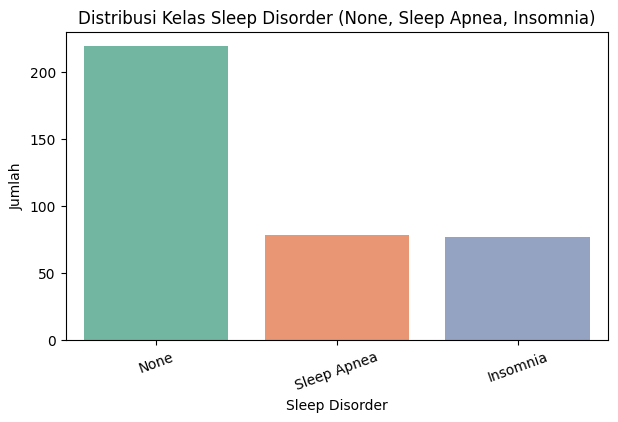

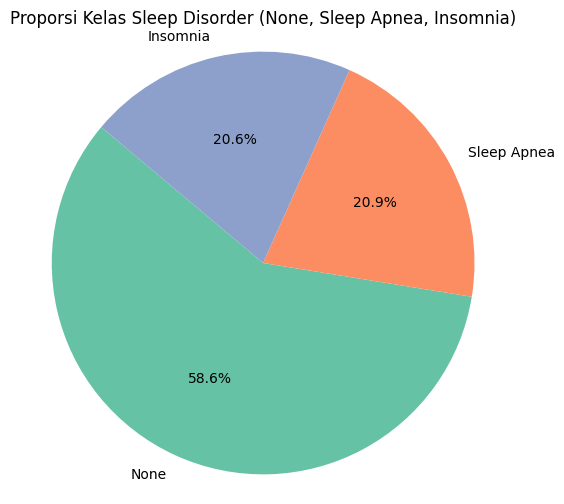


Tidak ada kelas minoritas yang proporsinya < 10% pada Sleep Disorder (None, Sleep Apnea, Insomnia).


In [14]:
# Hitung jumlah dan proporsi setiap kelas pada Sleep Disorder
disorder_counts = df['Sleep Disorder'].value_counts()
disorder_props = df['Sleep Disorder'].value_counts(normalize=True)

print("Jumlah tiap kelas Sleep Disorder (None, Sleep Apnea, Insomnia):")
print(disorder_counts)
print("\nProporsi tiap kelas Sleep Disorder (None, Sleep Apnea, Insomnia):")
print(disorder_props)

# Visualisasi: Barplot proporsi kelas
plt.figure(figsize=(7,4))
sns.barplot(x=disorder_counts.index, y=disorder_counts.values, palette='Set2')
plt.title('Distribusi Kelas Sleep Disorder (None, Sleep Apnea, Insomnia)')
plt.ylabel('Jumlah')
plt.xlabel('Sleep Disorder')
plt.xticks(rotation=20)
plt.show()

# Visualisasi: Pie chart proporsi kelas
plt.figure(figsize=(6,6))
plt.pie(disorder_counts, labels=disorder_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Proporsi Kelas Sleep Disorder (None, Sleep Apnea, Insomnia)')
plt.axis('equal')
plt.show()

# Highlight kelas minoritas
threshold_minoritas = 0.10  # misal, kelas dengan proporsi <10% dianggap minoritas
minority_classes = disorder_props[disorder_props < threshold_minoritas]

if not minority_classes.empty:
    print("\nPERINGATAN: Ditemukan kelas minoritas pada Sleep Disorder (proporsi < 10%):")
    for cls, prop in minority_classes.items():
        print(f"  - {cls}: {prop*100:.2f}% ({disorder_counts[cls]} data)")
else:
    print("\nTidak ada kelas minoritas yang proporsinya < 10% pada Sleep Disorder (None, Sleep Apnea, Insomnia).")

**Analisis Hubungan Fitur ke Target**

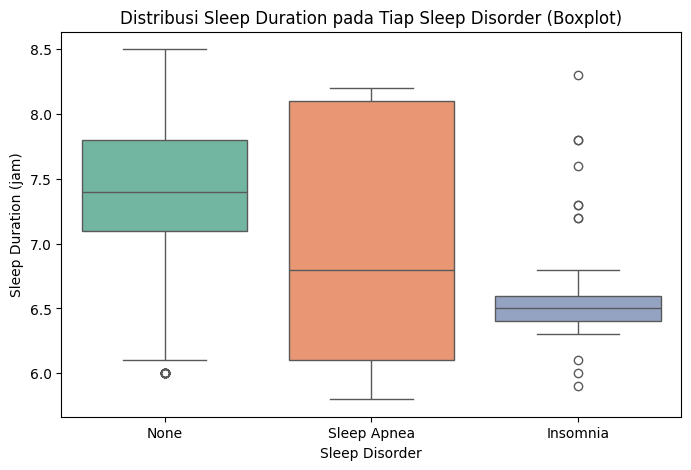

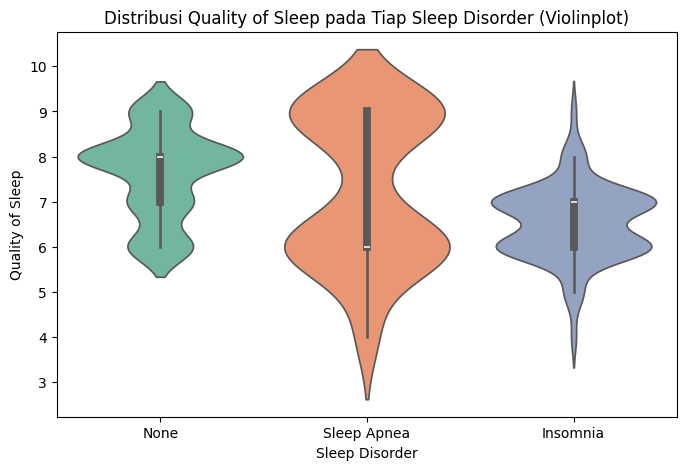

Rata-rata Quality of Sleep per Occupation:
Occupation
Engineer                8.412698
Lawyer                  7.893617
Accountant              7.891892
Nurse                   7.369863
Manager                 7.000000
Teacher                 6.975000
Doctor                  6.647887
Software Engineer       6.500000
Salesperson             6.000000
Scientist               5.000000
Sales Representative    4.000000
Name: Quality of Sleep, dtype: float64


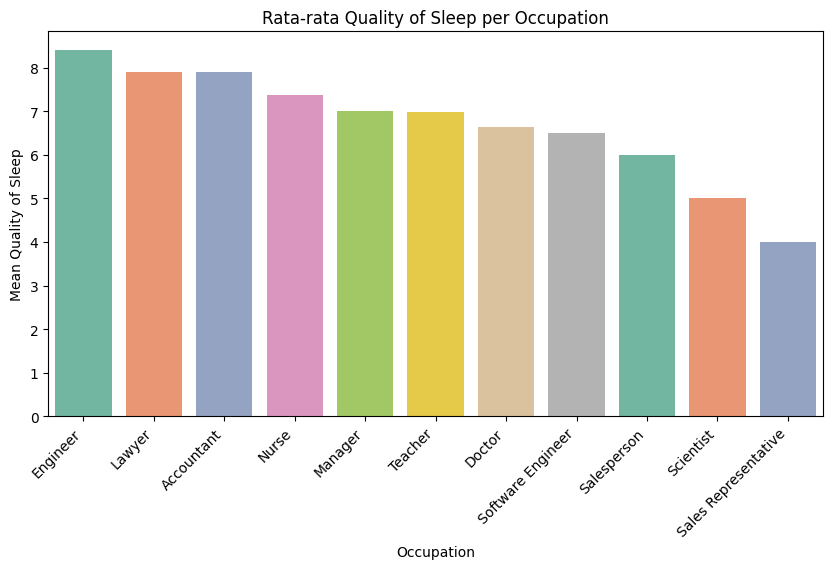


Rata-rata Quality of Sleep per Gender:
Gender
Female    7.664865
Male      6.968254
Name: Quality of Sleep, dtype: float64


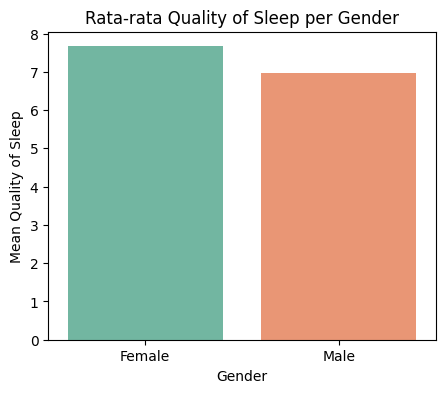

In [15]:
# Visualisasi distribusi fitur numerik berdasarkan kelas target Sleep Disorder
# Boxplot untuk melihat distribusi Sleep Duration pada tiap kelas Sleep Disorder
plt.figure(figsize=(8,5))
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df, palette='Set2')
plt.title('Distribusi Sleep Duration pada Tiap Sleep Disorder (Boxplot)')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration (jam)')
plt.show()

# Violinplot untuk melihat distribusi Quality of Sleep pada tiap kelas Sleep Disorder
plt.figure(figsize=(8,5))
sns.violinplot(x='Sleep Disorder', y='Quality of Sleep', data=df, palette='Set2')
plt.title('Distribusi Quality of Sleep pada Tiap Sleep Disorder (Violinplot)')
plt.xlabel('Sleep Disorder')
plt.ylabel('Quality of Sleep')
plt.show()

# Analisis rata-rata Quality of Sleep berdasarkan Occupation
mean_quality_occupation = df.groupby('Occupation')['Quality of Sleep'].mean().sort_values(ascending=False)
print("Rata-rata Quality of Sleep per Occupation:")
print(mean_quality_occupation)

# Visualisasi rata-rata Quality of Sleep per Occupation
plt.figure(figsize=(10,5))
sns.barplot(x=mean_quality_occupation.index, y=mean_quality_occupation.values, palette='Set2')
plt.title('Rata-rata Quality of Sleep per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Mean Quality of Sleep')
plt.xticks(rotation=45, ha='right')
plt.show()

# Analisis rata-rata Quality of Sleep berdasarkan Gender
mean_quality_gender = df.groupby('Gender')['Quality of Sleep'].mean()
print("\nRata-rata Quality of Sleep per Gender:")
print(mean_quality_gender)

# Visualisasi rata-rata Quality of Sleep per Gender
plt.figure(figsize=(5,4))
sns.barplot(x=mean_quality_gender.index, y=mean_quality_gender.values, palette='Set2')
plt.title('Rata-rata Quality of Sleep per Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Quality of Sleep')
plt.show()


**Insight EDA :**

1. Fitur Numerik:
- Usia peserta 27–59 tahun, rata-rata 42 tahun.
- Durasi tidur rata-rata 7,1 jam, mayoritas 6,4–7,8 jam.
- Kualitas tidur rata-rata 7,3 (skala 4–9), umumnya menengah-tinggi.
- Aktivitas fisik rata-rata 59 (rentang 30–90), gaya hidup beragam.
- Stres rata-rata 5,4 (skala 3–8), banyak di tingkat menengah.
- Detak jantung rata-rata 70 bpm, ada outlier >80.
- Langkah harian umumnya 5.000–8.000, sedikit outlier >10.000.

2. Fitur Kategorik:
- Gender hampir seimbang (pria 189, wanita 185).
- Profesi didominasi perawat, dokter, insinyur; profesi minoritas sangat sedikit.
- BMI mayoritas "Normal" (195) dan "Overweight" (148).
- Gangguan tidur: mayoritas "None" (58%), sisanya "Sleep Apnea" & "Insomnia" seimbang (~21%).

3. Korelasi Fitur:
- Korelasi sangat kuat: Durasi tidur & kualitas tidur (positif), aktivitas fisik & langkah harian (positif), kualitas tidur & stres (negatif), durasi tidur & stres (negatif), stres & detak jantung (positif).
- Korelasi sangat rendah: Banyak pasangan fitur, misal usia vs langkah, kualitas tidur vs langkah.

4. Outlier & Distribusi:
- Outlier jelas di detak jantung (>80) dan langkah harian (>10.000).
- Distribusi numerik umumnya simetris, beberapa sedikit skew ke kanan.

5. Proporsi Kelas:
- Gangguan tidur: "None" dominan, "Sleep Apnea" & "Insomnia" seimbang.
- Rata-rata kualitas tidur tertinggi pada engineer, terendah sales rep & scientist.
- Wanita rata-rata kualitas tidur lebih baik dari pria.

6. Kesimpulan:
- Kualitas tidur sangat dipengaruhi durasi tidur & stres.
- Aktivitas fisik saling berhubungan, tapi tidak terlalu terkait kualitas tidur.
- Imbalance pada kelas gangguan tidur perlu diperhatikan.
- Outlier & distribusi profesi minoritas bisa memicu bias prediksi.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
# Cek missing values
print("Jumlah missing values:\n", df.isnull().sum())

Jumlah missing values:
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [17]:
# Cek nilai duplikat
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 0


In [18]:
# Cek outlier pada fitur numerik menggunakan metode IQR
outlier_summary = {}

for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count
    }
    print(f"Fitur: {col}")
    print(f"  Jumlah outlier: {outlier_count}")
    print(f"  Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}")
    print("-" * 40)




Fitur: Age
  Jumlah outlier: 0
  Batas bawah: 13.12, Batas atas: 72.12
----------------------------------------
Fitur: Sleep Duration
  Jumlah outlier: 0
  Batas bawah: 4.30, Batas atas: 9.90
----------------------------------------
Fitur: Quality of Sleep
  Jumlah outlier: 0
  Batas bawah: 3.00, Batas atas: 11.00
----------------------------------------
Fitur: Physical Activity Level
  Jumlah outlier: 0
  Batas bawah: 0.00, Batas atas: 120.00
----------------------------------------
Fitur: Stress Level
  Jumlah outlier: 0
  Batas bawah: -0.50, Batas atas: 11.50
----------------------------------------
Fitur: Heart Rate
  Jumlah outlier: 15
  Batas bawah: 62.00, Batas atas: 78.00
----------------------------------------
Fitur: Daily Steps
  Jumlah outlier: 0
  Batas bawah: 2000.00, Batas atas: 11600.00
----------------------------------------


In [19]:
# Menggunakan metode clipping daripada z-score untuk menangani outlier karena:
# - Data distribusi tidak sepenuhnya normal, sehingga z-score bisa menyesatkan
# - Clipping (membatasi nilai ke percentile) lebih fleksibel untuk data skewed (condong)
df['Daily Steps'] = df['Daily Steps'].clip(lower=2000, upper=11600)
df['Heart Rate'] = df['Heart Rate'].clip(lower=62, upper=80)


In [20]:
# Gabungkan kelas Occupation yang jumlahnya sedikit ke dalam kategori 'others'
min_count = 10
vc = df['Occupation'].value_counts()
minority_cats = vc[vc < min_count].index
df['Occupation_cleaned'] = df['Occupation'].apply(lambda x: x if x not in minority_cats else 'Others')

print(df['Occupation_cleaned'].value_counts())


Occupation_cleaned
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Others         11
Name: count, dtype: int64


In [21]:
# Menggunakan LabelEncoder karena fitur kategorikal hanya memiliki dua atau beberapa kelas ordinal
# Label encoding untuk fitur kategorik: Gender, Occupation, BMI Category, dan Sleep Disorder
le_gender = LabelEncoder()
le_occupation = LabelEncoder()
le_bmi = LabelEncoder()
le_disorder = LabelEncoder()

# Transformasi label menjadi kode numerik dan simpan ke kolom baru
df['Gender_cod'] = le_gender.fit_transform(df['Gender'])
df['Occupation_cod'] = le_occupation.fit_transform(df['Occupation_cleaned'])
df['BMI Category_cod'] = le_bmi.fit_transform(df['BMI Category'])
df['Sleep Disorder_cod'] = le_disorder.fit_transform(df['Sleep Disorder'])

In [22]:
# Normalisasi / Standarisasi fitur numerik
from sklearn.preprocessing import StandardScaler

# Tentukan fitur numerik yang akan dinormalisasi
fitur_numerik = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                 'Stress Level', 'Heart Rate', 'Daily Steps']

# Standarisasi fitur numerik menggunakan StandardScaler langsung ke dataframe
scaler = StandardScaler()
df[fitur_numerik] = scaler.fit_transform(df[fitur_numerik])

In [23]:
# Simpan hasil preprocessing
output_path = 'Sleep_health_and_lifestyle_dataset_preprocessed.csv'
df.to_csv(output_path, index=False)
print("Data hasil preprocessing berhasil disimpan ke:", output_path)

Data hasil preprocessing berhasil disimpan ke: Sleep_health_and_lifestyle_dataset_preprocessed.csv
